# Matplotlib. Homework №1. Evgrafov Michail 915.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

### Задание №1

**Цель**: Построение столбчатых bar-диаграмм с помощью средств matplotlib.pyplot. 

**Используемые средства:**

>1. matplotlib.pyplot
>2. numpy
>3. Встроенные функции python.

Мне не хотелось прописывать каждую диаграмму вручную, как я это представлял себе изначально. Идея с функцией потерпела неудачу на этапе планирования, поскольку мне не хотелось давать пользователю большого контроля над областями рисунка. Тогда поле должно было бы создаваться в функции, что мне не нравилось, поскольку функция была бы некрасивой, и обладала бы большим количеством аргументов с распаковщиками и прочим. Поэтому решено было воспользоваться ООП. 

**Пару слов о memory_manager:** 

> Инициализируем менеджер памяти количеством строк и столбцов. Менеджер памяти - список размера N * M с булевыми значениями, где N - количеством строк, M - количество столбцов. Менеджер памяти имеет следующую логику работы: всё поле рисунка figure делится на N * M полей, в которые потенциально может быть помещена диаграмма, каждой ячейке i, j в соответствие ставится значение manager[i * N + j], равное axes, если поле занято, и None, если свободно. При добавлении новой диаграммы, менеджер памяти находит свободную зону на рисунке и добавляет туда поле для рисования, где и отрисовывается график, в сам массив добавляется объект axes. Если все возможные ячейки заполнены, менеджер памяти выдаёт ошибку. 

In [114]:
class MultiBars():
    """
    There is a class for building several
    number of bar diagramms
    
    """
    def __init__(self, nraws, mcols):
        self.__fig = plt.figure(figsize=(mcols * 6.4, nraws * 4.8))
        self.__memory = [None for i in range(nraws * mcols)]
        self.__weight = round(9 / (mcols * 10), 2)
        self.__hight = round(9 / (nraws * 10), 2)
        self.__raws = nraws
        self.__cols = mcols
        
    def __find_free_loc(self):
        """
        Find free location and return its index
        in memory
        
        """
        if not(np.all(self.__memory)):
            return self.__memory.index(None)
        
        return None
            
    def add_bar(self, title, labels, local, glob, l_label, g_label):
        """
        Add new diagram in memory
        
        """
        try:
            i = self.__find_free_loc()
            
            if i == None:
                raise Exception('Error: there are no free locs')
                
            left = (1 / self.__cols) * (i % self.__raws)
            bottom = (1 / self.__raws) * (i // self.__raws)
            
            ax = self.__fig.add_axes([left, bottom, self.__weight, self.__hight])
            
            x, width = np.arange(len(labels)), 0.4
            
            g_diagram = ax.bar(x, glob, width, color='m', edgecolor='k',
                                     label=g_label)
            l_diagram = ax.bar(x, local, width, color='c', edgecolor='k',
                                     label=l_label)
            
            ax.set_title(title, fontsize=15, fontweight='bold')
            ax.set_xticks(x)
            ax.set_xticklabels(labels, fontsize=11, fontweight='bold')
            ax.set_ylabel('Amount', fontsize=11, fontweight='bold')
            
            ax.legend()
            ax.grid()
            
            self.__memory[i] = ax
            
        except Exception as err:
            print(err.args)
            
    def show(self):
        """
        Show all diagramms
        
        """
        plt.show()

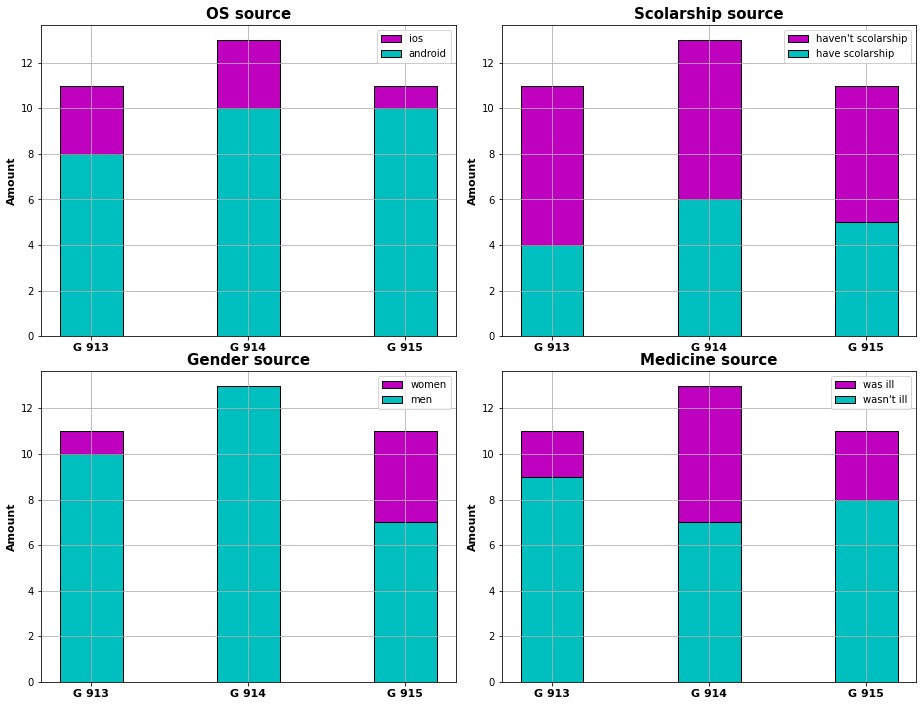

In [120]:
labels = ['G 913', 'G 914', 'G 915']

amount_of_people = [11, 13, 11] 
group_amounts = [[10, 13, 7],
                 [9, 7, 8],   
                 [8, 10, 10], 
                 [4, 6, 5]]   

titles = ['Gender source', 'Medicine source', 'OS source', 'Scolarship source']
l_labels = ['men', "wasn't ill", 'android', 'have scolarship']
g_labels = ['women', 'was ill', 'ios', "haven't scolarship"]
                 
my_bars = MultiBars(2, 2)

for i in range(len(titles)):
    my_bars.add_bar(titles[i], labels, group_amounts[i], amount_of_people,
                   l_labels[i], g_labels[i])
    

    
my_bars.show()